# Assemblage de la matrice d&#8217;élément fini

Ce TP est à effectuer en python, l&#8217;énoncé est [ici](https://feelpp.github.io/csmi-edp-assemblage/).
## Lecture d&#8217;un fichier Gmsh

Le fichier GmshRead.py contient une classe mesh dont les objets sont les données associées à un maillage triangulaire $\mathrm{P} 1$ en $2 \mathrm{D}$ contruit à partir d&#8217;un fichier gmsh (v4).
Un élément de la classe maillage contient:

- `Nnodes`: nombre de noeuds du maillage
- `Nodes`: tableau de taille (Nnodes, 2 ) contenant les coordonnées des noeuds du maillage
- `label`: tableau de taille Nnodes contenant des informations sur la location du noeud (noeud du bords / noeuds interne)
- `Nel`: nombre d&#8217;éléments du mailage
- `connect` : tableau de connectivité de taille `(Nel, 3 )`

Pour les remplir, il parcoure un fichier .msh ligne à ligne (`line = f.readline()`) et récupère les données en parsant chaque ligne ( `line.split()` ).
* **Q1**\
Remplir le tableau `connect`.


Dans ce projet, je réalise une étude de l'équation de Poisson qui est donnée par :

Trouver $u$ tel que :

$$
-\Delta u = f \quad \text{dans} \quad \Omega
$$

avec la condition aux limites :

$$
u_{\Gamma} = 0
$$

La formulation variationnelle est la suivante : 

Il existe $u \in H_{0}^{1}(\Omega)$ tel que

$$
\int_{\Omega} \nabla u \cdot \nabla v \, d \omega=\int_{\Omega} f v \, d \omega \quad \forall v \quad \text{tel que} \quad v \in H_{0}^{1}(\Omega)
$$

Dans le fichier `GmeshRead.py`, il y a une classe qui lit les maillages que j'ai discrétisés. Elle parcourt tous les éléments et tous les nœuds. J'ai déclaré des dictionnaires et des listes pour stocker différentes informations de `carre.msh`.

In [63]:
# l'appel de la fonction mesh2d du module GmeshRead pour le carré 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")

Le tableau de connectivité a déjà été rempli dans la classe. Il suffit de l'appeler ici pour voir les résultats qu'il contient. Dans ce tableau, j'ai connecté les éléments et les nœuds et j'ai mis le nombre à 0 pour faciliter les calculs ultérieurs. Par exemple, (0,0):47 donne cette information : nous sommes sur le premier élément et le premier nœud. Normalement, l'élément ne commence pas à 0, mais j'ai calculé le nombre total et j'ai soustrait les autres éléments, par exemple les lignes et les points.

In [64]:
mesh.process()
connectivité = mesh.connect
print(connectivité[0,0])


1


Voici quelques informations que j'ai stockées, par exemple les coordonnées de chaque point et aussi du bord, ainsi que le nombre total d'éléments dans `carre.msh` (`cercle.msh`).

In [65]:
# cords il prend les coordonnées des noeuds par le identifiant du noeud
cords = mesh.connectoo
# les identifiant des points sur le bord
bord = mesh.neudes_bord
# les points ici il prends les coordonnées des points par les numerotations de 0 à Ne  des points
points = mesh.coords
# le nombre total des elements de .msh
total = mesh.total
print(cords[81,1])
print(bord[0])
print(points[1])
print(total)


(0.0, 0.0)
1
(0.0, 0.0)
802


In [66]:
cels = mesh.nodes[0]
cels

array([ 1,  5, 76])

* **Q2**\
Ajouter un tableau diam de taille `Nel` qui contient le diamètre de chacun des éléments, ainsi que le paramètre h du maillage.


J'ai fait cela dans la classe, donc il suffit de l'appeler pour voir les résultats.

In [67]:
diametre = mesh.diam
print(diametre[0])

0.07443229275655824


* **Q3**\
Ajouter un tableau area de taille `Nel` qui contient l&#8217;aire de chacun des éléments.


La même chose pour les aires.

In [68]:
aire = mesh.aire
print(aire[0])

0.0013850415512494984


*Tip:* l&#8217;aire d&#8217;un parallélogramme est égale au produit vectoriel/ déterminant des deux vecteurs qui l&#8217;engendrent
* **Q4**\
Tester votre code avec le maillage d&#8217;un rectangle triangulé régulièrement.


In [69]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/rectangle.msh")
mesh.process()

In [70]:
aire = mesh.aire
sum = 0
for i in range(len(aire)):
    sum += aire[i]
print(sum)

1.9999999999999998


* **Q5**\
Vérifier que l&#8217;aire du rectangle est bien la somme des aires des triangles.


In [71]:
# La fonction qui calcule l'aire du rectangle et vérifie si l'aire du rectangle 
# est égale à la somme des aires des triangles
import numpy as np
def calcul_aire_rectangle(self):
    # Trouver les points les plus éloignés en x et en y
    x_coords = [coord[0] for coord in self.coords.values()]
    y_coords = [coord[1] for coord in self.coords.values()]
    largeur = max(x_coords) - min(x_coords)
    hauteur = max(y_coords) - min(y_coords)

    # Calculer et retourner l'aire du rectangle
    return largeur * hauteur
mesh2d.calcul_aire_rectangle = calcul_aire_rectangle
print(mesh.calcul_aire_rectangle())

def verifie_aire(self):
    aire_rectangle = self.calcul_aire_rectangle()
    somme_aire_triangles = np.sum(self.aire)

    # Vérifier si les deux aires sont égales
    if np.isclose(aire_rectangle, somme_aire_triangles):
        print("L'aire du rectangle est égale à la somme des aires des triangles.")
    else:
        print("L'aire du rectangle n'est pas égale à la somme des aires des triangles.")
mesh2d.verifie_aire = verifie_aire
mesh.verifie_aire()

2.0
L'aire du rectangle est égale à la somme des aires des triangles.


* **Q6**\
Vérifier la même chose sur une géométrie différente du rectangle.


In [72]:
# l'appel de la fonction mesh2d du module GmeshRead pour le paralelgramme
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/paralel.msh")
mesh.process()

In [73]:
aire = mesh.aire
sum = 0
for i in range(len(aire)):
    sum += aire[i]
print(sum)

0.9999999999999996


In [74]:
# La fonction qui calcule l'aire du parallélogramme et vérifie si l'aire du parallélogramme
def calcul_aire_parallelogramme(self):
    # les 4 sommets [p1, p2, p3, p4]
    p1, p2, p3, p4 = list(self.coords.values())[:4]

    # Calculer les vecteurs base et hauteur
    base = np.array(p2) - np.array(p1)
    hauteur = np.array(p4) - np.array(p1)

    # Projeter le vecteur hauteur sur le vecteur base
    hauteur_proj = (np.dot(hauteur, base)/np.linalg.norm(base)**2)*base

    # Calculer l'aire du parallélogramme
    aire = np.linalg.norm(base) * np.linalg.norm(hauteur_proj)

    return aire
mesh2d.calcul_aire_parallelogramme = calcul_aire_parallelogramme
print(mesh.calcul_aire_parallelogramme())

def verifie_aire(self):
    aire_parallelogramme = self.calcul_aire_parallelogramme()
    somme_aire_triangles = np.sum(self.aire)

    # Vérifier si les deux aires sont égales
    if np.isclose(aire_parallelogramme, somme_aire_triangles):
        print("L'aire du parallélogramme est égale à la somme des aires des triangles.")
    else:
        print("L'aire du parallélogramme n'est pas égale à la somme des aires des triangles.")

mesh2d.verifie_aire = verifie_aire
mesh.verifie_aire()

1.0
L'aire du parallélogramme est égale à la somme des aires des triangles.


## Base de l&#8217;élément fini P1.

Considérons le triangle de sommets $a_{1}=(0,0), a_{2}=(1,0)$ et $a_{3}=(0,1),$ comme éléments de références.
La base d&#8217;élément fini associé à chacun de ces points est donnée par:

$$
\psi_{1}(x, y)=1-(x+y), \quad \psi_{2}(x, y)=x, \quad \psi_{3}(x, y)=y
$$
* **Q1**\
Créer une fonction `coord(1d)` qui prend en entrée un tableau de taille 3 contenant les coordonnées barycentriques $\left(\lambda_{1}, \lambda_{2}, \lambda_{3}\right)$ d&#8217;un point et renvoie le tableau de taille 2 contenant les coordonnées de ce point:

  
$$
(x, y)=\lambda_{1} a_{1}+\lambda_{2} a_{2}+\lambda_{3} a_{3}
$$




In [75]:
import numpy as np
def coord(lambdas):

    # Définir les sommets du triangle
    a = np.array([[0, 0], [1, 0], [0 , 1]])

    return np.dot(lambdas, a)
# condition la somme des lambdas doit être égale à 1
t=coord([1, 0, 0])
t

array([0, 0])

* **Q2**\
Nous souhaitons créer une fonction `base_psiref()`` qui permettra d&#8217;effectuer les quadratures
sur l&#8217;élément de référence. Cette fonction doit renvoyer les quatre tableaux suivants:




In [76]:
import numpy as np
def basis_psiref():
    # Coordonnées barycentriques des points de quadrature
    pts = np.array([
        [1/3, 1/3, 1/3],
        [1/2, 1/2, 0],
        [0, 1/2, 1/2],
        [1/2, 0, 1/2],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

    # Poids de quadrature associés
    wght = np.array([9/40, 2/30, 2/30, 2/30, 1/40, 1/40, 1/40])

    # Valeur des 3 fonctions de base aux 7 points de quadrature
    psi = np.array([
        [1 - coord(pt)[0] - coord(pt)[1] for pt in pts],
        [coord(pt)[0] for pt in pts],
        [coord(pt)[1] for pt in pts]
    ])

    # Valeur des gradients des 3 fonctions de base aux 7 points de quadrature
    derpsi = np.array([
        [[-1, -1] for _ in pts],
        [[1, 0] for _ in pts],
        [[0, 1] for _ in pts]
    ])

    return pts, wght, psi, derpsi
pts, wght, psi, derpsi = basis_psiref()
#print(2*wght)
#print(pts)
#print(wght)
#print(psi)
#print(derpsi[0,0])

## Assemblage de la matrice.

* **Q1**\
Créer une `class poisson` qui contient un prend à la contruction en entrée un maillage `Mh` et une fonction, `f`, correspondant au second membre de l&#8217;équation. Un élément de la classe contiendra de plus `Ndof`, le nombre de degrés de liberté (correspondant au nombre de noeuds du maillage), une matrice de taille `(Ndof,Ndof)`, stockée intialement au format [dok](https://scipy-lectures.org/advanced/scipy_sparse/dok_matrix.html), un tableau `rhs` de taille `Ndof`, contenant le second membre du système linéaire et enfin un tableau u de taille `Ndof` contenant la solution approchée.


In [77]:
from scipy.sparse import dok_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class Poisson:
    def __init__(self, Mh, f):
        self.Mh = Mh
        self.f = f
        self.Ndof = Mh.Nnodes  # Nombre de noeuds du maillage
        print("nodes", self.Ndof)
        self.M = dok_matrix((self.Ndof, self.Ndof), dtype=np.float64)  # Matrice A
        self.D = dok_matrix((self.Ndof, self.Ndof), dtype=np.float64)
        self.rhs = np.zeros(self.Ndof)  # Second membre du système linéaire
        self.B = np.zeros(self.Ndof)  # Second membre du système linéaire
        self.O = np.zeros(self.Ndof)  # Second membre du système linéaire
        self.u = np.zeros(self.Ndof)  # Solution approchée
    def assemble_matrix(self):
        pts, wght, psi, derpsi = basis_psiref()
        for nel in range(self.Mh.Nel):
            self.K = np.zeros((3,3), dtype=np.float64) 
            self.L = np.zeros((3,3), dtype=np.float64)
            A = self.Mh.coords[self.Mh.nodes[nel,0]] # noeuds du triangle
            E = self.Mh.coords[self.Mh.nodes[nel,1]]
            C = self.Mh.coords[self.Mh.nodes[nel,2]]
            Jac = np.array([[E[0] - A[0], C[0] - A[0]],[E[1] - A[1], C[1] - A[1]]]) # Jacobien de l'élément
            #print('jac',Jac)
            detT = np.linalg.det(Jac) # det(T_K)
            #print(detT)
            comT = np.linalg.inv(Jac.T)  # det(T_K) * (nabla (T_K))^{-1} = com(T_{K})^{-1}
            #print('comT',comT)
            # print(f"Element {nel}:")
            # print(f"Jacobian:\n{Jac}")
            # print(f"detT: {detT}")
            # print(f"comT:\n{comT}")
            for i, wgh in enumerate(wght):
                for ni in range(3):
                    inode = self.Mh.connect[nel, ni] - 1
                    dpsi_i = np.dot(comT, derpsi[ni,i]) # Calculer le gradient de psi pour le noeud i
                    for nj in range(3):
                        self.K[ni, nj] += wgh *detT* np.dot(psi[nj,i],psi[ni,i])
                        jnode = self.Mh.connect[nel, nj] - 1
                        dpsi_j = np.dot(comT,derpsi[nj,i])  # Calculer la dérivée de psi pour le noeud j
                        self.L[ni,nj] += wgh *detT* np.dot(dpsi_i,dpsi_j)
                        self.M[inode, jnode] += wgh *detT* np.dot(dpsi_i,dpsi_j) 
                        self.D[inode, jnode] += wgh *detT* np.dot(psi[nj,i],psi[ni,i])
            # print("L",self.L)
        self.M = self.M.tocsc() # Convertir la matrice A au format CSC pour des calculs plus efficaces
        self.D = self.D.tocsc()
        self.K = self.K
        self.L = self.L
     #######################################################
     # https://perso.univ-lyon1.fr/marc.buffat/COURS/BOOK_ELTFINIS_HTML/CoursEF/Notebook/EltFinis2D/Laplace2D.html
     # Une deuxième méthode pour calculer le terme droite B sans utiliser les quadratures    
    def Smb(self,Mh,F):
        self.Ndof = Mh.Nnodes
        for k in range(self.Mh.Nel):
            Me = self.K
            ni = [self.Mh.connect[k, 0] - 1,self.Mh.connect[k, 1] - 1,self.Mh.connect[k, 2] - 1]
            Fe=F[np.ix_(ni)]
            self.B[np.ix_(ni)] += np.dot(Me,Fe)
    
    ########################################################
    # Une fonction pour calculer la fonction u sur le bord du domaine dans les cas qu'on a des condition differentes de 0
    def BordG(self,Mh,G):
        self.Ndof = Mh.Nnodes
        for k in range(self.Mh.Nel):
            Me=self.K
            ni = [self.Mh.connect[k, 0] - 1,self.Mh.connect[k, 1] - 1,self.Mh.connect[k, 2] - 1]
            Fe=G[np.ix_(ni)]
            self.O[np.ix_(ni)] += np.dot(Me,Fe)
    ########################################################     
    # une fonction qui calcule la norme en L^2 grace a ca definition
    # int_omega f^2 dx = sum_{K =1 to Nel} int_K f^2 dx     
    def intL2(self,F):
    #calcul integrale L2 d'une fonction F sur un maillage G 
        somme=0.0
        for k in range(self.Mh.Nel):
            Me = self.K
            ni = [self.Mh.connect[k, 0] - 1,self.Mh.connect[k, 1] - 1,self.Mh.connect[k, 2] - 1]
            Fe = F[np.ix_(ni)]
            somme += np.dot(Fe,np.dot(Me, Fe))
        return somme
    ########################################################
    # trace de la solution et l'erreur
    # une autre methode pour tracer la solution et l'erreur 
    def trace(self,U,Uex):
        x = np.array([coord[0] for coord in mesh.coords.values()])
        y = np.array([coord[1] for coord in mesh.coords.values()])
        plt.figure(figsize=(12,5))
        plt.subplot(1,3,1)
        plt.axis('equal'); plt.axis('off')
        plt.tricontourf(x, y, U, levels=14, cmap='viridis')
        plt.colorbar(label='U')
        plt.title("Solution EF")
        plt.subplot(1,3,2)
        plt.axis('equal'); 
        plt.axis('off')
        plt.tricontourf(x, y, Uex, levels=14, cmap='viridis')
        plt.colorbar(label='U')
        plt.title("Exact")
        plt.subplot(1,3,3)
        plt.axis('equal'); 
        plt.axis('off')
        plt.tricontourf(x, y, Uex - U, levels=14, cmap='viridis')
        plt.colorbar(label='U')
        plt.title("Erreur")
        plt.show()
        return
    
    #############################################################
    # La méthode qui calcule le seconde terme par la methode des quadratures 
    def rhss(self):
        pts, wght, psi, derpsi = basis_psiref()
        for nel in range(self.Mh.Nel): 
            A = self.Mh.coords[self.Mh.nodes[nel,0]] # noeuds du triangle
            B = self.Mh.coords[self.Mh.nodes[nel,1]]
            C = self.Mh.coords[self.Mh.nodes[nel,2]]
            Jac = np.array([[B[0] - A[0], C[0] - A[0]],[B[1] - A[1], C[1] - A[1]]]) # Jacobien de l'élément
            detT = np.linalg.det(Jac) # det(T_K)
            for i, wgh in enumerate(wght):
                for ni in range(3):
                    inode = self.Mh.connect[nel, ni] - 1 
                    self.rhs[inode] += wgh   *detT * self.f(coord(pts)[i,0], coord(pts)[i,1]) * psi[ni,i]
    #############################################################
    # ajoute les conditions de Neumann
    def neuemann_conditions(self,Mh,cond):
        
        self.M = self.M.toarray()
        self.D = self.D.toarray()
        self.Ndof = Mh.Nnodes
        nb = len(mesh.neudes_bord)
        for i in [node-1 for node in mesh.neudes_bord]:
            self.M[i, :i] = 0
            self.M[i, i+1:] = 0
            self.D[i, :i] = 0
            self.D[i, i+1:] = 0
            self.M[:i, i] = 0
            self.M[i+1:, i] = 0
            self.D[:i, i] = 0
            self.D[i+1:, i] = 0
            # self.M[i, i] = 1
            # self.D[i, i] = 1
            # on elimine cette point noramalement car au ce ponts la n'apparient pas a la frontiere triangule (0,0) juste la discretisation qui l'ajoute dans le cas ou on a disque 
            self.M[1,1] = 1
            self.D[1,1] = 1
        for j in range(nb,self.Ndof):
            self.O[j] = 0
        
        if cond =='homogene':
            for i in [node-1 for node in mesh.neudes_bord]:
                self.B[i] = self.B[i]
                self.rhs[i]= self.rhs[i]
        else:
            for i in range(self.Ndof):
                self.B[i] = self.B[i] + self.O[i]
        
        
#############################################################"
# ajoute les conditions de Dirichlet
    def dirichlet_conditions(self):
        self.M = self.M.toarray()
        self.D = self.D.toarray()
        for i in [node-1 for node in mesh.neudes_bord]:
            self.M[i, :] = 0
            # self.D[i, :] = 0
            self.M[:, i] = 0
            # self.D[:, i] = 0
            self.M[i, i] = 1
            # self.D[i, i] = 1
            self.rhs[i] = 0
            self.M[1,1] = 1
            # self.D[1,1] = 1
            self.B[i] = 0
            
    ########################################################
    # plot de la solution
    def plot_sol(self,sol):
        x = np.array([coord[0] for coord in mesh.coords.values()])
        y = np.array([coord[1] for coord in mesh.coords.values()])
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        surf = ax.plot_trisurf(x, y, sol, linewidth=0.2, antialiased=True, cmap=plt.cm.CMRmap)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.figure()
        plt.tricontourf(x, y, sol, levels=14, cmap='viridis')
        plt.colorbar(label='U')
        plt.title("Solution EF")
        plt.show()
    ########################################################
    # La méthode qui calcule la solution
    def solve(self,method,cond,prob,plot=False):
        if prob == 'laplacien':
            if cond == 'disque':
                if method == 'quad':
                    self.u = np.linalg.solve(self.M , self.rhs)
                    self.u[1] = 0.25
                elif method == 'dirict':
                    self.u = 2*np.linalg.solve(self.M , self.B)
                    self.u[1] = 0.25
                if plot:
                    self.plot_sol(self.u)
            else:
                if method == 'quad':
                    self.u = np.linalg.solve(self.M , self.rhs)
                elif method == 'dirict':
                    self.u = np.linalg.solve(self.M , self.B)
                if plot:
                    self.plot_sol(self.u)
        else :
            if cond == 'disque':
                if method == 'quad':
                    self.u = np.linalg.solve(self.M + self.D , self.rhs)
                    self.u[1] = 0.25
                elif method == 'dirict':
                    self.u = np.linalg.solve(self.M + self.D , self.B)
                    self.u[1] = 0.25
                if plot:
                    self.plot_sol(self.u)
            else:
                if method == 'quad':
                   self.u = np.linalg.solve(self.M + self.D , self.rhs)
                elif method == 'dirict':
                   self.u = np.linalg.solve(self.M + self.D , self.B)
                if plot:
                   self.plot_sol(self.u)
    ########################################################
    # La méthode qui calcule l'erreur en L2 et H1
    def compute(self, ue,method):
        max_aire = np.amax(mesh.aire)
        err = self.u - ue
        if method == 'quad':
            norm_L2 = np.linalg.norm(err*np.sqrt(max_aire),2)
            norm_discrete_H1 = err.T @ self.M @ err
            norm_H1 = norm_L2 + np.sqrt(norm_discrete_H1)
        elif method == 'dirict':
            norm_L2 = self.intL2(self.u - ue)
            norm_discrete_H1 = err.T @ self.M @ err
            norm_H1 = norm_L2 + np.sqrt(norm_discrete_H1)
        print("Norme L2 = {:.2e}".format(norm_L2))
        print("Norme H1 = {:.2e}".format(norm_H1))

* **Q2**\
Ajouter une fonction `assemble_matrix(self)` qui assemble la matrice. On pourra compléter le code suivant :


Dans la class Poisson j'ai mis la fonction assemble_matrix il suffit de l'appler

In [78]:
# l'appel de la fonction mesh2d du module GmeshRead pour un carré pour tester notre code  
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [79]:
print( len(mesh.neudes_bord))

76


In [80]:
# on teste notre code par la fonction f(x,y) = 1
def f(x, y):
    return 1
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = np.ones(mesh.Nnodes)
instance = Poisson(mesh, f)
instance.assemble_matrix()

Resolution de - laplacien u = f
nodes 400


* **Q3**\
La matrice précédente est la matrice associée au Laplacien avec condition de Neumann. Pour inclure des conditions de Dirichlet, utiliser la méthode d&#8217;élimination


De même, pour les conditions de Dirichlet, j'ajoute une fonction dirichlet_conditions dans la classe, qui attribue la valeur 0 aux nœuds correspondant aux points situés sur le bord

In [81]:
# Ajoute condituin de Dirichlet
instance.dirichlet_conditions()



* **Q4**\
Créer sur le même modèle une fonction `rhs( self)` qui assemble le second membre. Pour inclure des conditions de Dirichlet, il faut aussi que `rhs[inode] = 0` dès que `inode` correspond à un noeud du bord.




De même, j'ai fait deux fonction qui calcule le second terme soit rhs soit Smb les deux sont dans la classe Poisson  


In [82]:
instance.rhss() 
instance.Smb(mesh,F)

* **Q5**\
Créer une fonction `solve( self)` qui calcule la solution approchée.





Dans la classe Poisson, j'ai ajouté la fonction solve qui résout le système MU=B et retourne le vecteur U

In [83]:
print('Resolution par la methode des quadratures')
instance.solve('quad','carre','laplacien')


Resolution par la methode des quadratures


In [84]:
print('Resolution par la methode directe')
instance.solve('dirict','carre','laplacien')

Resolution par la methode directe


* **Q6**\
Ajouter une fonction `plot_sol( self)` qui permet d’afficher la solution approchée et ajouter un argument `plot` dans la fonction `solve`.



Aussi pour la fonction plot_sol est dans la class Poisson 

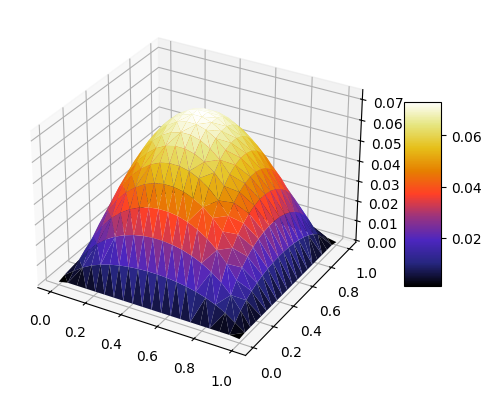

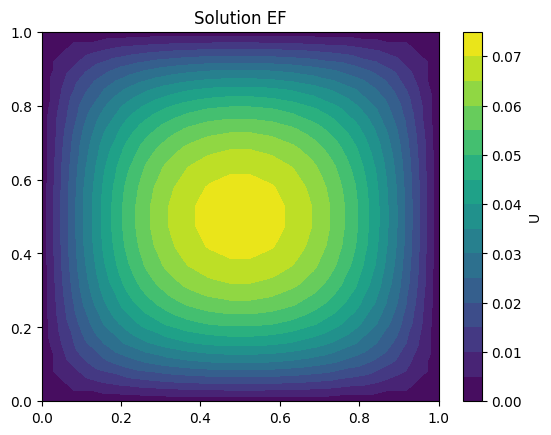

In [85]:
instance.solve('quad','carre','laplacien',plot=True)

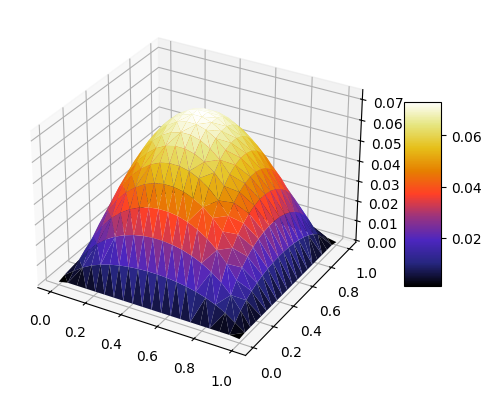

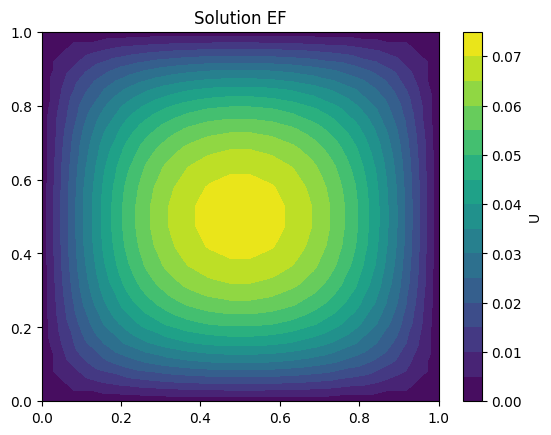

In [86]:
instance.solve('dirict','carre','laplacien',plot=True)

Dans ce cas la on va tester notre code avec les condition de neuman homogene 

In [87]:
# l'appel de la fonction mesh2d du module GmeshRead pour un carré pour tester notre code  
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [88]:
# on teste notre code par la fonction f(x,y) = 1
def f(x, y):
    return 1
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = np.ones(mesh.Nnodes)
instance = Poisson(mesh, f)
instance.assemble_matrix()

Resolution de - laplacien u = f
nodes 400


In [89]:
# Ajoute condituin de Dirichlet
instance.neuemann_conditions(mesh,'homogene')



In [90]:
instance.rhss() 
instance.Smb(mesh,F)

In [91]:
print('Resolution par la methode des quadratures')
instance.solve('quad','carre','laplacien')


Resolution par la methode des quadratures


In [92]:
print('Resolution par la methode des quadratures')
instance.solve('dirict','carre','laplacien')

Resolution par la methode des quadratures


Resolution par la methode des quadratures


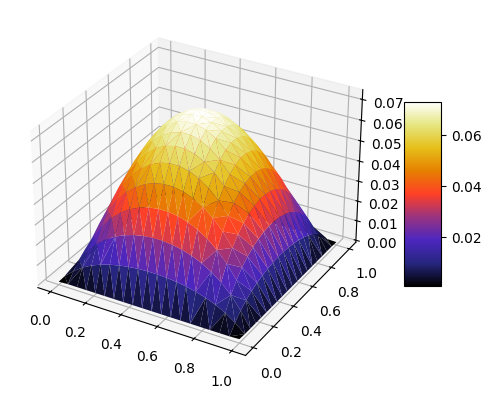

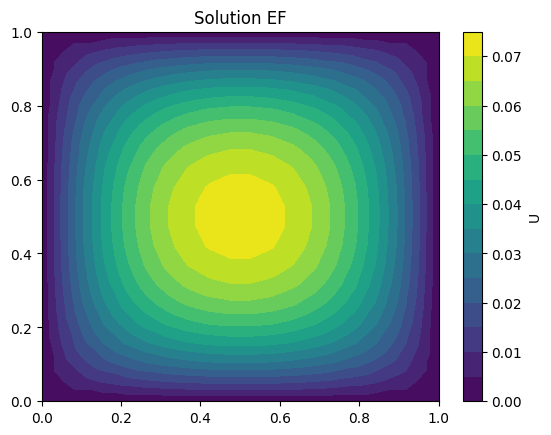

In [93]:
print('Resolution par la methode des quadratures')
instance.solve('quad','carre','laplacien',plot=True)

Resolution par la methode des quadratures


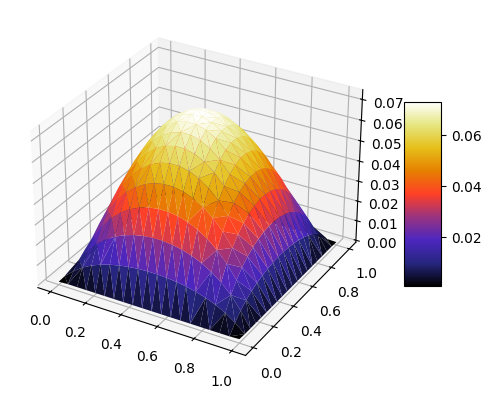

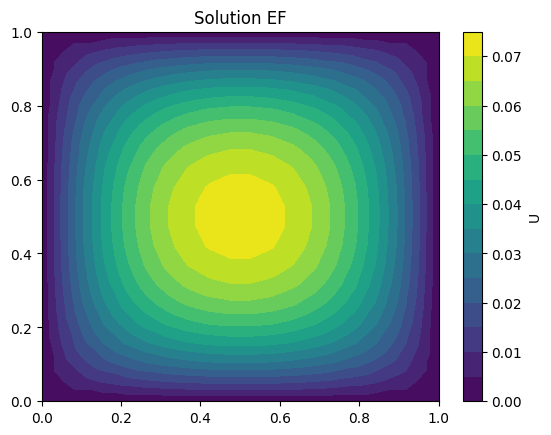

In [94]:
print('Resolution par la methode des quadratures')
instance.solve('quad','dirict','laplacien',plot=True)

* **Q7**\
Tester votre fonction avec un maillage du disque et la fonction `f = 1`. Calculer la solution exacte et son gradient.


In [95]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/cercle.msh")
mesh.process()

In [96]:
# on teste notre code par la fonction f(x,y) = 1 dans un disque
def f(x, y):
    return 1
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = np.ones(mesh.Nnodes)
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.dirichlet_conditions()

Resolution de - laplacien u = f
nodes 424


In [97]:
# La résolution de systeme 
instance.rhss() 
instance.Smb(mesh,F)


In [98]:
print('Resolution par la methode des quadratures')
instance.solve('quad','disque','laplacien')

Resolution par la methode des quadratures


In [99]:
print('Resolution par la methode des quadratures')
instance.solve('dirict','disque','laplacien')

Resolution par la methode des quadratures


plot de la solution par la méthode des quadratures


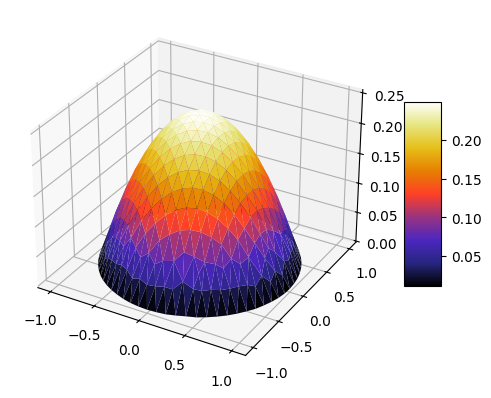

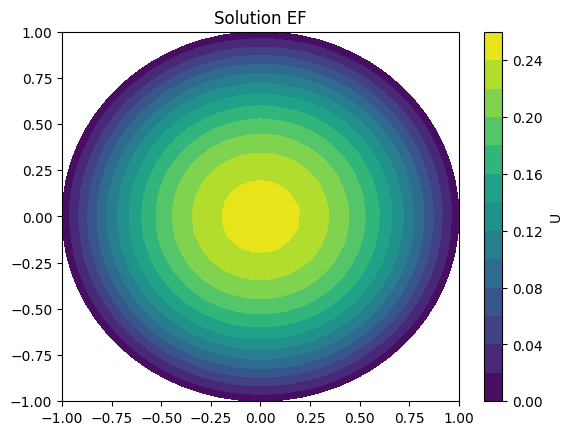

In [100]:
print('plot de la solution par la méthode des quadratures')
instance.solve('quad','disque','laplacien',plot=True)

plot de la solution par la méthode directe


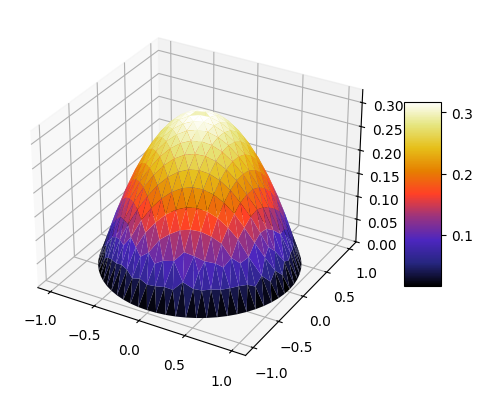

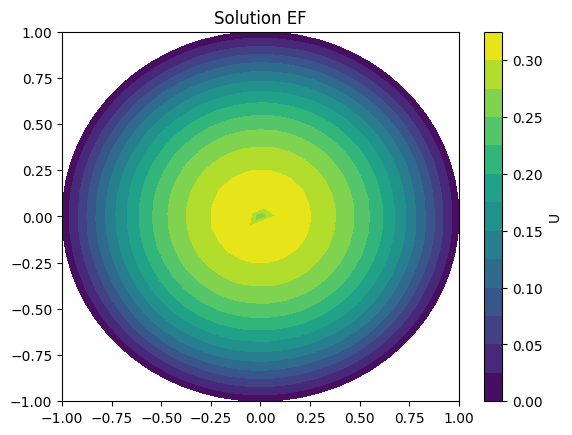

In [101]:
print('plot de la solution par la méthode directe')
instance.solve('dirict','disque','laplacien',plot=True)

In [102]:
print("La solution exacte donne par cette fonction est u(x,y) = (1 - x^2 - y^2)/4")
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
def f_exact(x,y):
    return (1- x**2 - y**2)/4
Uex = f_exact(x,y)

for i in [node-1 for node in mesh.neudes_bord]:
    Uex[i] = 0




La solution exacte donne par cette fonction est u(x,y) = (1 - x^2 - y^2)/4


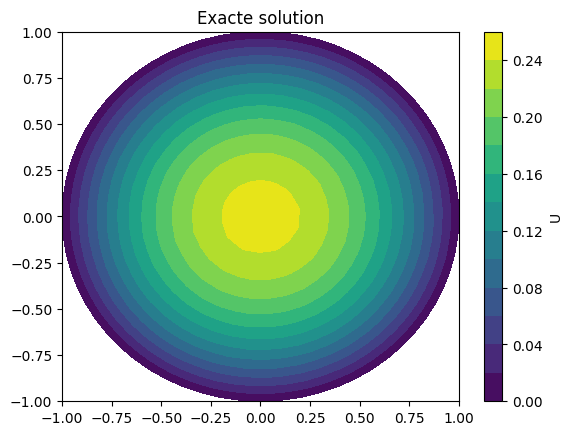

In [103]:
plt.tricontourf(x, y, Uex, levels=14, cmap='viridis')
plt.colorbar(label='U')
plt.title("Exacte solution")
plt.show()

* **Q8**\
Ajouter une fonction `compute( self)` qui calcule l&#8217;erreur en norme $L^2$
et en norme $H^1$ entre la solution approchée et la solution exacte (projetée sur l&#8217;espace d&#8217;élément finis P1). Vérifier l&#8217;ordre de convergence numérique.


De la même façon, la fonction `compute` existe aussi dans la classe `Poisson`.

In [104]:
# on calcule le pas de discretisation h
h = mesh.h
print(h**2)

0.016066419452877494


In [105]:
# Calcul de l'erreur en norme L2 et H1 dans le cas de la méthode des quadratures
instance.compute(Uex,'quad')

Norme L2 = 6.18e-02
Norme H1 = 2.49e-01


In [106]:
# Calcul de l'erreur en norme L2 et H1 dans le cas de la méthode directe
instance.compute(Uex,'dirict')

Norme L2 = 3.45e-03
Norme H1 = 1.90e-01


* **Q9**\
Facultatif: Implémenter le support de condition de Neumann non homogène


* **Q10**\
Tester votre code avec conditions de Dirichlet et Neumann homogènes  sur une géométrie non triviale de votre choix avec une solution manufacturée dans l&#8217;espace et une non-polynomiale en faisant une étude de convergence.

  
  - tester une solution constante (l&#8217;erreur doit être nulle)




In [107]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [108]:
# Dans ce cas la on voit l'ereur n'est pas nulle car le seconde terme egale 0 
def f(x, y):
    return 0
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = np.zeros(mesh.Nnodes)
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.dirichlet_conditions()
instance.rhss() 
instance.Smb(mesh,F)
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
ue = np.ones(mesh.Nnodes)
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Resolution de - laplacien u = f
nodes 400
Norme L2 = 7.44e-01
Norme H1 = 1.29e+01
Norme L2 = 1.00e+00
Norme H1 = 1.32e+01



- tester une solution linéaire (l&#8217;erreur doit être nulle)


In [109]:
# Dans ce cas la on voit l'ereur n'est pas nulle car le seconde terme egale 0 
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
def function(x,y):
    return x+y
ue = function(x,y)
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Norme L2 = 8.10e-01
Norme H1 = 1.48e+01
Norme L2 = 1.17e+00
Norme H1 = 1.51e+01



- tester une solution quadratique (l&#8217;erreur n&#8217;est plus nulle)


In [110]:
# Dans ce cas il y a une infinité des solutions de cette equation ce qui montre l'erreur n'a pas de sens car il n'y a pas une unique solution comme un disque 
def f(x, y):
    return -4
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = -4*np.ones(mesh.Nnodes)
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.dirichlet_conditions()
instance.rhss() 
instance.Smb(mesh,F)
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
def function(x,y):
    return (x-y)**2
ue = function(x,y)
for i in [node-1 for node in mesh.neudes_bord]:
    ue[i] = 0
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Resolution de - laplacien u = f
nodes 400
Norme L2 = 2.28e-01
Norme H1 = 3.78e+00
Norme L2 = 9.84e-02
Norme H1 = 3.65e+00



- tester une solution non polynomiale (l&#8217;erreur n&#8217;est plus nulle)


In [111]:
# Dans ce cas puisque la solution est unique on peut  calculer l'erreur et aussi ca donne une bonne resulatat 
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
def f(x,y):
    return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = f(x,y)
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.dirichlet_conditions()
instance.rhss() 
instance.Smb(mesh,F)
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
def function(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
ue = function(x,y)
for i in [node-1 for node in mesh.neudes_bord]:
    ue[i] = 0
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Resolution de - laplacien u = f
nodes 400
Norme L2 = 2.45e-03
Norme H1 = 2.05e-02
Norme L2 = 1.16e-05
Norme H1 = 1.81e-02


Dans ce cas, je vais présenter deux cas différents de résolution de l'équation avec les conditions de Neumann homogène et non homogène.

Cas au la condition de neuman homogene  

In [112]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [113]:
# On considére l'exemple de la finction u(x,y) = sin(pi*x)*sin(pi*y)
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
def f(x,y):
    return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = f(x,y)
instance = Poisson(mesh, f)
instance.assemble_matrix()
# Ajoute condituin de Dirichlet
instance.neuemann_conditions(mesh,'homogene')
instance.rhss() 
instance.Smb(mesh,F)
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
def function(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
ue = function(x,y)
for i in [node-1 for node in mesh.neudes_bord]:
    ue[i] = 0
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Resolution de - laplacien u = f
nodes 400
Norme L2 = 2.43e-03
Norme H1 = 1.93e-02
Norme L2 = 1.16e-05
Norme H1 = 1.69e-02


Dans le cas ou la condition est non homogene 

In [114]:
# On considére l'exemple de la finction u(x,y) = sin(pi*x)*sin(pi*y)
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
def f(x,y):
    return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = f(x,y)
instance = Poisson(mesh, f)
instance.assemble_matrix()
# Ajoute condituin de Dirichlet
instance.neuemann_conditions(mesh,'Non homogene')

Resolution de - laplacien u = f
nodes 400


In [115]:
# D'abord on calcule les derivees de la fonction u(x,y) = sin(pi*x)*sin(pi*y) sur la frontiere et on l'ajoute ici 
def Gdriven(x, y):
    result = np.zeros_like(x)
    mask_y0 = (y == 0)
    mask_x1 = (x == 1)
    mask_y1 = (y == 1)
    mask_x0 = (x == 0)
    
    result[mask_y0] = -np.sin(np.pi * x[mask_y0])
    result[mask_x1] = -np.sin(np.pi * y[mask_x1])
    result[mask_y1] = -np.sin(np.pi * x[mask_y1])
    result[mask_x0] = -np.sin(np.pi * y[mask_x0])
    
    return result

G = Gdriven(x,y)

In [116]:
instance.rhss() 
instance.Smb(mesh,F)
instance.BordG(mesh,G)
instance.solve('quad','carre','laplacien')
instance.solve('dirict','carre','laplacien')
def function(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
ue = function(x,y)
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Norme L2 = 2.43e-03
Norme H1 = 1.93e-02
Norme L2 = 1.16e-05
Norme H1 = 1.69e-02


# Remarque

Le problème   
$$
-\Delta u = f \quad \text{dans} \quad \Omega
$$

avec la condition aux limites :

$$
\frac{\partial u}{\partial n} = g \quad \text{sur} \quad \Gamma
$$

Dans ce cas, la forme $a(u,u)$ n'est pas coercive, ce qui explique les résultats d'erreurs ci-dessus.

# Neumann non homogène pour ce problème

Le problème   
$$
 u -\Delta u = f \quad \text{dans} \quad \Omega
$$

avec la condition aux limites :

$$
\frac{\partial u}{\partial n} = g \quad \text{sur} \quad \Gamma
$$

Dans ce cas, la forme $a(u,u)$ n'est pas coercive, ce qui explique les résultats d'erreurs ci-dessus.

In [117]:
# On considére l'exemple de la finction u(x,y) = sin(pi*x)*sin(pi*y)
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
def f(x,y):
    return (1 + 2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y)
# convertir en vecteur pour le produit scalaire
print('Resolution de - laplacien u = f')
F = f(x,y)
instance = Poisson(mesh, f)
instance.assemble_matrix()
# Ajoute condituin de Dirichlet
instance.neuemann_conditions(mesh,'Non homogene')

Resolution de - laplacien u = f
nodes 400


In [118]:
# D'abord on calcule les derivees de la fonction u(x,y) = sin(pi*x)*sin(pi*y) sur la frontiere et on l'ajoute ici 
def Gdriven(x, y):
    result = np.zeros_like(x)
    mask_y0 = (y == 0)
    mask_x1 = (x == 1)
    mask_y1 = (y == 1)
    mask_x0 = (x == 0)
    
    result[mask_y0] = -np.sin(np.pi * x[mask_y0])
    result[mask_x1] = -np.sin(np.pi * y[mask_x1])
    result[mask_y1] = -np.sin(np.pi * x[mask_y1])
    result[mask_x0] = -np.sin(np.pi * y[mask_x0])
    
    return result

G = Gdriven(x,y)

Resolution de probleme u - laplacien = f ou les conditions de neuman non homogene


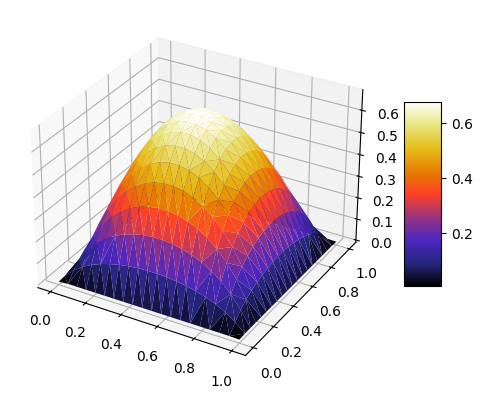

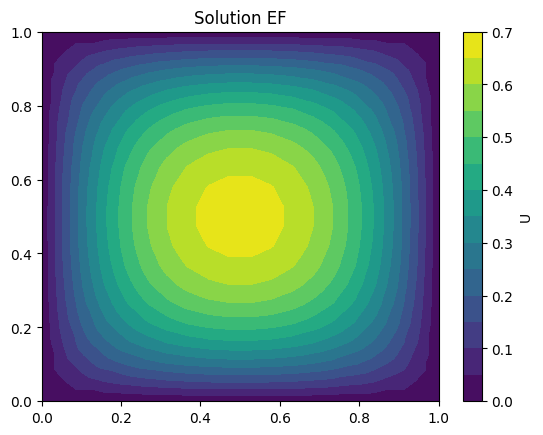

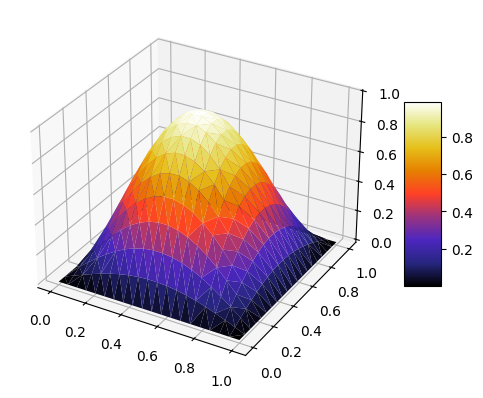

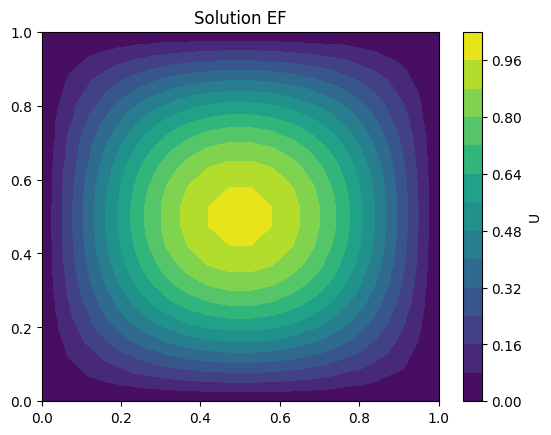

In [119]:
print('Resolution de probleme u - laplacien = f ou les conditions de neuman non homogene')
instance.rhss() 
instance.Smb(mesh,F)
instance.BordG(mesh,G)
instance.solve('quad','carre','u - laplacien')
instance.solve('dirict','carre','u - laplacien')
instance.solve('quad','carre','u - laplacien',plot=True)
instance.solve('dirict','carre','u - laplacien',plot=True)


In [120]:
def function(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
ue = function(x,y)
instance.compute(ue,'quad')
instance.compute(ue,'dirict')

Norme L2 = 2.31e-03
Norme H1 = 1.87e-02
Norme L2 = 1.05e-05
Norme H1 = 1.64e-02


# Remarque 
Dans ce notebook, j'ai utilisé deux méthodes pour calculer les intégrales : soit directement, soit avec les quadratures. Il y a des différences au niveau des maillages et aussi selon le type de problème.


## Implementation le cas parabolique avec Feel++

Soit $\Omega=[0,1]^2$, rajouter le terme de dérivée en temps $\frac{\partial u}{\partial t}$, implémenter un schéma Euler implicite en temps,  linéaire par morceaux en espace, des conditions de Dirichlet et un second membre donnés par les fonctions ci-dessous de telle facon que ces fonctions soient solutions du problème et tester l&#8217;erreur $L^2$ au dernier pas de temps avec les fonctions
* **Q1**\
$t+x$ sur l&#8217;intervalle de temps $[0,1]$ avec $\Delta t=0.1$, Qu&#8217;observez vous concernant l&#8217;erreur ?


* **Q2**\
$\sin(\pi x)\cos(\pi y)exp(-t)$ sur l&#8217;intervalle de temps $[0,1]$ avec $\Delta t=0.1$


* **Q3**\
$\sin(\pi x)\cos(\pi y)exp(-t)$ sur l&#8217;intervalle de temps $[0,1]$ avec $\Delta t=0.05$


* **Q4**\
Comparer l&#8217;erreur sur les 2 derniers cas.


# Application l'équation de la chaleur avec le temps 

Le problème donne :
$$
 \frac{\partial u}{\partial t} - \alpha \Delta u = 0 \quad \text{dans} \quad \Omega
$$

avec la condition aux limites :

$$
  u = 0 \quad \text{sur} \quad \Gamma
$$

Dans ce cas, la forme $a(u,u)$ n'est pas coercive, ce qui explique les résultats d'erreurs ci-dessus.

In [129]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [130]:
def f(x, y):
    return 1
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.rhss() 

nodes 400


In [131]:
# La methode pour calculer les iteration du temps avec la methode de Euler explicite dans ce cas 
def mul(b, A, x):
    V = np.linalg.inv(A)
    # N = V @ A
    b[:] = V @ x 

def euler_ex_loop(u_temp, S, u, Nt):
    for n in range(Nt):
        mul(u_temp, S, u)
        for i in [node-1 for node in mesh.neudes_bord]:
            u_temp[i] = 0
        u[:] = u_temp

def euler_ex(u0, Nx, T, Nt,alpha,A,M):
    dt = T / Nt
    S = np.identity(Nx) + alpha * dt * (M @ A)
    u = u0.copy()
    u_temp = np.empty_like(u)
    euler_ex_loop(u_temp, S, u, Nt)
    return u

In [132]:
instance.dirichlet_conditions()

In [138]:
A = instance.M
M = instance.D
M_inv = np.linalg.inv(M)
T0 = 1
Nx = 400
# alpha est la diffusivité thermique du matériau (une constante positive)  
alpha = 1.0 
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
F = T0 * np.ones(Nx)
for i in [node-1 for node in mesh.neudes_bord]:
    F[i] = 0
Nt=1000
T=1
dt=T/Nt
u = euler_ex(F, Nx, T, Nt,alpha,A,M_inv)

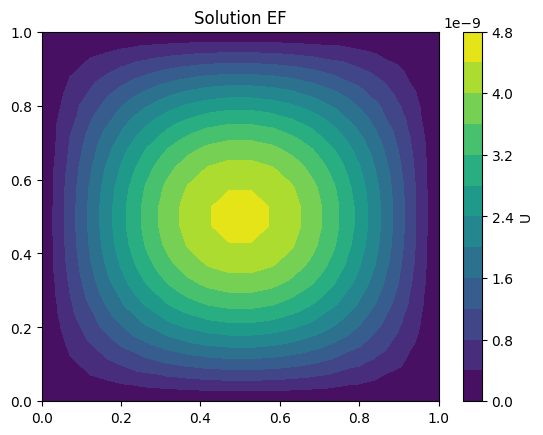

In [139]:
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
#t = np.linspace(0,1,10)
plt.figure()
plt.tricontourf(x, y, u, levels=14, cmap='viridis')
plt.colorbar(label='U')
plt.title("Solution EF")
plt.show()

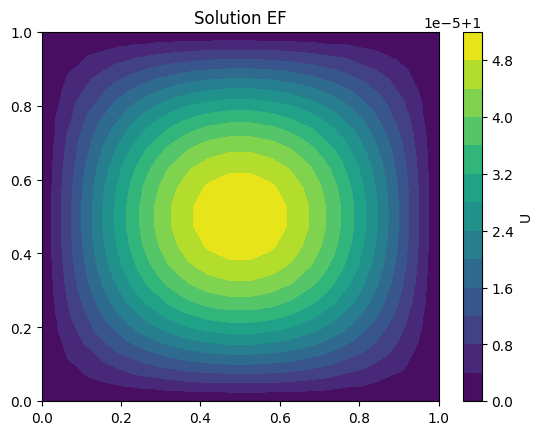

In [140]:
# La solution exacte
T0 = 1  # Température aux frontières
alpha = 1.0  # Coefficient de diffusion
t = 1.0 # Temps auquel on veut la solution

# Grille spatiale
X = np.array([coord[0] for coord in mesh.coords.values()])
Y = np.array([coord[1] for coord in mesh.coords.values()])

# Solution exacte à l'instant t
U_exact = T0 + np.exp(-alpha * np.pi**2 * t) * np.sin(np.pi * X) * np.sin(np.pi * Y)

# Tracer la solution exacte
plt.figure()
plt.tricontourf(X, Y, U_exact, levels=14, cmap='viridis')
plt.colorbar(label='U')
plt.title("Solution EF")
plt.show()

J'ai essayé de sauvegarder les solutions à chaque pas de temps pour faire une animation sur ParaView.

In [144]:
import numpy as np
import pyvista as pv
from pyvirtualdisplay import Display

# Définir les fonctions
def mul(b, A, x):
    b[:] = A @ x 

def euler_ex_loop(u_temp, S, u, Nt):
    results = np.zeros((u.shape[0], Nt))
    for n in range(Nt):
        mul(u_temp, S, u)
        for i in [node-1 for node in mesh.neudes_bord]:
            u_temp[i] = 300
        u[:] = u_temp
        results[:, n] = u_temp
    return results

def euler_ex(u0, Nx, T, Nt, alpha, C, A):
    dt = T / Nt
    S = np.identity(Nx) - alpha * dt * (A)
    u = u0.copy()
    u_temp = np.empty_like(u)
    results = euler_ex_loop(u_temp, S, u, Nt)
    return results

# Calculer les solutions
A = instance.M
D = instance.D
D = np.linalg.inv(D)

T0 = 300
alpha = 1.16e-4 
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
F = T0 + 100 * np.sin(np.pi * x) * np.sin(np.pi * y)
Nx = 400
Nt = 5000  # Réduire le nombre de pas de temps pour tester
T = 1
dt = T / Nt
u = euler_ex(F, Nx, T, Nt, alpha, D, A)  # u est une matrice de taille (Nx, Nt)

In [145]:
# Les coordonnées des nœuds
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])

# Créez un maillage PyVista
points = np.column_stack((x, y, np.zeros_like(x)))  # Ajoutez une dimension z avec des zéros

# Créez un dictionnaire pour mapper les identifiants des nœuds aux indices
node_id_to_index = {node_id: index for index, node_id in enumerate(sorted(mesh.coords.keys()))}

# Créez les cellules une methode qui sur GmshRead.py
cels = mesh.nodes
cells = np.hstack([[3, node_id_to_index[cell[0]], node_id_to_index[cell[1]], node_id_to_index[cell[2]]] for cell in cels])  # 3 indique un triangle suivi des indices des nœuds

# Créez le maillage PyVista avec les cellules
mesh_pv = pv.PolyData(points, cells)

for t in range(Nt):
    if t % 50 == 0:  # Enregistrer tous les 50 itérations
        # Ajouter la variable "u" (température) pour le pas de temps t
        mesh_pv['u'] = u[:, t]  # 'u' est la matrice des températures, de taille (Nx, Nt)

        # Sauvegarder chaque pas de temps dans un fichier VTK
        filename = f'./sol_temp/heat_transfer_{t:04d}.vtk'
        mesh_pv.save(filename)
print("Tous les fichiers VTK ont été générés.")

Tous les fichiers VTK ont été générés.


# Application l'équation d'onde d'ordre 2 en temps

Le problème donne :
$$
 \frac{\partial^2 u}{\partial t^2} - c \Delta u = 0 \quad \text{dans} \quad \Omega
$$

avec la condition aux limites :

$$
  u = 0 \quad \text{sur} \quad \Gamma
$$


In [146]:
# l'appel de la fonction mesh2d du module GmeshRead pour rectangle 
from GmeshRead import mesh2d
mesh = mesh2d("./maillage/carre.msh")
mesh.process()

In [147]:
def f(x, y):
    return 1
instance = Poisson(mesh, f)
instance.assemble_matrix()
instance.rhss() 

nodes 400


In [148]:
# La methode pour calculer les iteration du temps 
def mul(b, A, x):
    b[:] = A @ x 

def euler_ex_loop(u_temp, S, u,u_prev, Nt):
    for n in range(1,Nt):
        for i in [node-1 for node in mesh.neudes_bord]:
            u_prev[i] = 0
        mul(u_temp, S, u)
        u_temp =  2*u_temp - u_prev  
        for i in [node-1 for node in mesh.neudes_bord]:
            u_temp[i] = 0
            u[i] = 0
        u_prev[:] = u
        u[:] = u_temp

def euler_ex(u0,u1,T, Nt,c,A):
    dt = T / Nt
    S = (c**2) * (dt**2) * A
    u = u1.copy()
    u_prev = u0.copy()
    u_temp = np.empty_like(u)
    euler_ex_loop(u_temp, S, u,u_prev, Nt)
    return u

In [149]:
instance.dirichlet_conditions()

In [150]:
A = instance.M
# # La vitese d'onde (une constante positive) 
c= 1 
Nx=400
Nt=5000
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
F = np.sin(np.pi * x) * np.sin(np.pi * y)
u1 = np.zeros(Nx)
T=2
u = euler_ex(F,u1,T, Nt,c,A)

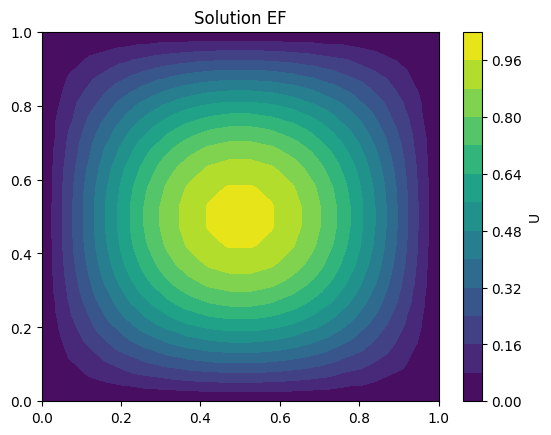

In [151]:
x = np.array([coord[0] for coord in mesh.coords.values()])
y = np.array([coord[1] for coord in mesh.coords.values()])
plt.figure()
plt.tricontourf(x, y, u, levels=14, cmap='viridis')
plt.colorbar(label='U')
plt.title("Solution EF")
plt.show()

La solution exacte associée au problème d'onde

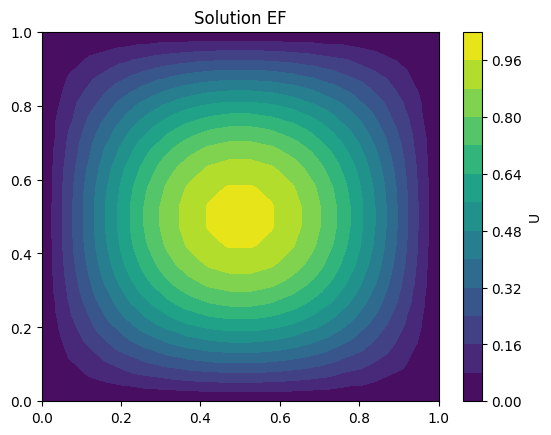

In [152]:
# La solution exacte

c = 1  # La vitese d'onde (une constante positive)
t = 2  # Temps auquel on veut la solution

# Grille spatiale
X = np.array([coord[0] for coord in mesh.coords.values()])
Y = np.array([coord[1] for coord in mesh.coords.values()])

# Solution exacte à l'instant t
U_exact = np.cos(np.pi *c *t) * np.sin(np.pi * X) * np.sin(np.pi * Y)

# Tracer la solution exacte
plt.figure()
plt.tricontourf(X, Y, U_exact, levels=14, cmap='viridis')
plt.colorbar(label='U')
plt.title("Solution EF")
plt.show()

In [153]:
# On va calculer l'erreur dans ce cas et on va voir l'ordre de convergence
E = u - U_exact
Error = instance.intL2(E)
print('Erreur en L^2 = ', Error)


Erreur en L^2 =  2.2452810295777366e-19
